In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import cv2
import time
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import shutil 
from sklearn.model_selection import train_test_split
from itertools import combinations
import os, sys, tarfile

# Importing and preparing pairs

#### Face Recognition Dataset, a database of face photographs designed for the creation of face detection and recognition models. This dataset has been derived from the Labeled Faces in the Wild Dataset.
#### This dataset is a collection of JPEG pictures of famous people collected on the internet.
#### The Dataset : Each picture is centered on a single face, and every image is encoded in RGB. The original images are of the size 250 x 250. The dataset contains 1680 directories, each representing a celebrity. Each directory has 2-50 images for the celebrity.
#### Extracted Faces: Faces extracted from the original image using Haar-Cascade Classifier (cv2) encoded in RGB and size of image is 128, 128

In [ ]:
pip install patool

     |████████████████████████████████| 77 kB 4.1 MB/s 


In [ ]:

import patoolib
patoolib.extract_archive("/content/drive/MyDrive/LFW/FaceData.rar", outdir="/content/drive/MyDrive/LFW")

patool: Extracting /content/drive/MyDrive/LFW/FaceData.rar ...
patool: running /usr/bin/unrar x -- /content/drive/MyDrive/LFW/FaceData.rar
patool:     with cwd='/content/drive/MyDrive/LFW'


PatoolError: ignored

### Iterate through files in a subdir

In [3]:
directory = r'/content/drive/MyDrive/LFW/Face Data/Face Dataset'
for filename in os.listdir(directory):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        print(os.path.join(directory, filename))
    else:
        continue

### Iterate through files and subdirs in a dir

In [4]:
photos_person=0
persons=0
name=[]
photo=[]
flw = r'/content/drive/MyDrive/LFW/Face Data/Face Dataset'
for directory in os.listdir(flw):
    path=os.path.join(flw, directory)
    persons = persons +1
    #print(path)
    for filename in os.listdir(path):
        #print(os.path.join(path, filename))
        if filename.endswith(".jpg") or filename.endswith(".png"):
            #print(os.path.join(path, filename))
            photos_person = photos_person+1
            
        else:
            continue
    #print(directory,photos_person)
    name.append(directory)
    photo.append(photos_person)
    photos_person =0
    dict = {'id': name, 'photo': photo} 
    df = pd.DataFrame(dict)
df

,id,photo
0,725,2
1,720,4
2,731,4
3,721,12
4,742,9
...,...,...
1675,727,9
1676,736,3
1677,733,3
1678,738,2


In [5]:
df.dtypes

id       object
photo     int64
dtype: object

In [6]:
dups = df.pivot_table(index=['photo'], aggfunc='size') #the number of persons with n photos 
dups

photo
2     779
3     291
4     187
5     112
6      55
7      39
8      33
9      26
10     15
11     16
12     10
13     11
14     10
15     11
16      3
17      8
18      5
19      7
20      5
21      4
22      5
23      3
24      3
25      1
26      2
27      1
28      2
29      2
30      2
31      2
32      3
33      3
35      1
36      1
37      1
39      2
41      2
42      2
44      1
48      1
49      1
50     12
dtype: int64

In [7]:
n=0
p=0
for i in photo:
    if i>10 :
        n=n+i
        p=p+1
print('quantite de personnes: ',p,' ayant plus de 10 photos, totale des photos: ',n)

quantite de personnes:  143  ayant plus de 10 photos, totale des photos:  3214


#### on remarque qu'il y a 143  personnes qui ont plus de 10 photos allant jusqu'a 530 photos ce qui emmenra au overfitting des modeles d'ou on decide de les eliminer

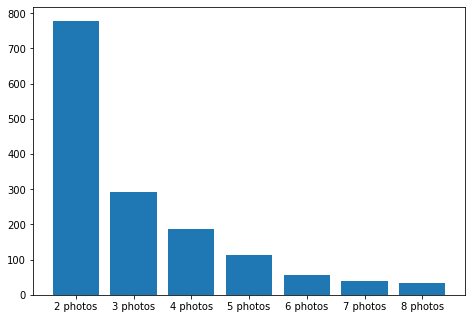

In [8]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
nb=[dups[2],dups[3],dups[4],dups[5],dups[6],dups[7],dups[8]]
photos = ['2 photos','3 photos','4 photos','5 photos','6 photos','7 photos','8 photos']
ax.bar(photos,nb)
plt.show()

#### on decide de prendre les personnes ayant entre 3 et 5 photos

In [9]:
df_filtered = df[(df['photo'] <= 5 )&( df['photo'] > 1)]
df_filtered

,id,photo
0,725,2
1,720,4
2,731,4
7,741,2
8,730,2
...,...,...
1674,726,2
1676,736,3
1677,733,3
1678,738,2


In [ ]:
lstname=df_filtered['id'].tolist()

#### Resultat 1369 personnes avec 2 a 5 photos

In [ ]:
flw = r'/content/drive/MyDrive/LFW/Face Data/Face Dataset'
flw_trim = r'Face DatasetTrim '
for directory in os.listdir(flw):
    path_src=os.path.join(flw, directory)
    if directory in lstname:
        path_dest=os.path.join(flw_trim, directory)
        #print(path_dest)
        destination = shutil.copytree(path_src, path_dest) 
    else:
          continue

### Statistiques sur les listes de comparaisons:

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = '2 photos', '3 photos', '4 photos', '5 photos'
sizes = [dups[2],dups[3],dups[4],dups[5]]
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

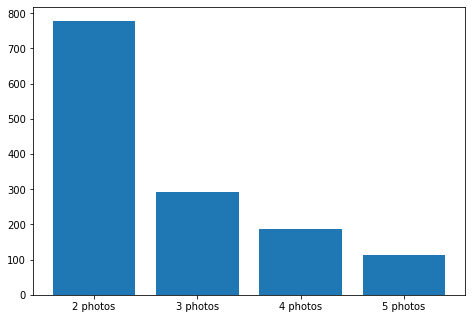

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
nb=[dups[2],dups[3],dups[4],dups[5]]
photo = ['2 photos','3 photos','4 photos','5 photos']
ax.bar(photo,nb)
plt.show()

#### categorie 2 photos : 779 personnes  
#### categorie 3 photos : 291 personnes
#### categorie 4 photos : 187 personnes
#### categorie 5 photos : 112 personnes


#### on organise le datatset sour forme de 70% de donnees de chaque categorie en trainset et 30% de chaque categorie en testset 

In [ ]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(df_filtered, test_size=0.3, random_state=25)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")


No. of training examples: 958
No. of testing examples: 411


In [ ]:
train_name=training_data['id'].tolist()
test_name=testing_data['id'].tolist()

In [ ]:
flw_trim = r'/content/Face DatasetTrim '
flw_train = r'Face Dataset Train'
flw_test = r'Face Dataset Test'
for directory in os.listdir(flw_trim):
    path_src=os.path.join(flw_trim, directory)
    if directory in train_name:
        path_dest=os.path.join(flw_train, directory)
        #print(path_dest)
        destination = shutil.copytree(path_src, path_dest)   
    else:
        path_dest=os.path.join(flw_test, directory)
        #print(path_dest)
        destination = shutil.copytree(path_src, path_dest) 

In [ ]:
def text_file(similar_data,dissimilar_data):
    str1 = ''.join(str(e) for e in similar_data)
    str2 = ''.join(str(e) for e in dissimilar_data)
    intraclasse = open("intraclasse.txt","w")
    intraclasse.write(str1)
    intraclasse.close()
    interclasse = open("interclasse.txt","w")
    interclasse.write(str2)
    interclasse.close()

In [ ]:
f = r'Face Dataset Train'
for directory in os.listdir(f):
    path=os.path.join(f, directory)
    print(directory)


206
1409
1047
1647
444
1274
1301
561
147
257
1397
22
781
1533
1162
609
1348
1532
885
1379
741
842
1134
557
1037
714
534
1543
838
1672
957
1392
191
754
506
849
422
476
895
310
1120
1314
798
416
465
108
1603
181
101
875
156
480
834
1553
371
16
1070
320
59
455
1185
4
541
49
1302
1353
51
272
97
1090
1518
1576
1604
1344
405
341
1424
1319
336
259
1140
1514
48
763
926
352
906
811
945
1263
1159
518
1065
850
925
1403
546
1638
1358
678
1074
1056
1330
1303
1180
547
1602
460
73
302
575
1115
159
1233
1154
1460
847
399
983
532
632
267
1507
917
1341
1163
873
353
996
814
1304
902
37
1030
564
956
1520
1386
943
1572
176
1059
877
453
1657
1040
203
530
492
76
1618
199
924
606
193
237
577
1271
1064
1019
114
323
461
418
549
1323
1434
19
202
685
1236
569
1596
941
648
1658
950
1415
121
225
208
672
139
1374
65
1606
778
722
260
1435
217
43
1360
1361
1637
1273
1077
428
1012
120
915
1336
912
1452
899
1228
893
1172
41
659
50
568
1193
521
1126
1334
1086
1378
790
1625
1512
1396
1111
477
1277
966
1325
1480
1258
681
1

In [ ]:
def create_pairs_inter(ROOT):
    num_folders = len(os.listdir(ROOT))
    dissimilar_data_id1 = []
    dissimilar_data_id2 = []
    dissimilar_data_img1 = []
    dissimilar_data_img2 = []
    ids=[]
    for i in os.listdir(ROOT):
        ids.append(int(i))
    #print(ids)
    for i in os.listdir(ROOT):
        files=os.listdir(os.path.join(ROOT, i))
        #print(i)
        
        # Creating pairs of different faces 0
        for j in range(int(i), min(int(i)+80, num_folders)):
            #print(j)
            if j in ids:
                #print(j)
                #dissimilar_data.append(((str(i), "0.jpg"), (str(j), "0.jpg"), 0))
                dissimilar_data_id1.append(i)
                dissimilar_data_img1.append("0.jpg")
                dissimilar_data_id2.append(str(j))
                dissimilar_data_img2.append("0.jpg")
        dicti2 = {'id1': dissimilar_data_id1, 'img1': dissimilar_data_img1, 'id2': dissimilar_data_id2, 'img2': dissimilar_data_img2} 
        dfdsim = pd.DataFrame(dicti2)
    return dfdsim


In [ ]:
def create_pairs_intra(ROOT):
    num_folders = len(os.listdir(ROOT))
    similar_data_id1 = []
    similar_data_id2 = []
    similar_data_img1 = []
    similar_data_img2 = []
    
    for i in os.listdir(ROOT):
        files=os.listdir(os.path.join(ROOT, i)) 
        
        # Creating pairs of similar faces 1
        for pair in list(combinations(files, 2)):
            #similar_data.append(((str(i), pair[0]), (str(i), pair[1]), 1))
            similar_data_id1.append(str(i))
            similar_data_img1.append(pair[0])
            similar_data_id2.append(str(i))
            similar_data_img2.append(pair[1])
        dicti1 = {'id1': similar_data_id1, 'img1': similar_data_img1, 'id2': similar_data_id2, 'img2': similar_data_img2} 
        dfsim = pd.DataFrame(dicti1)
    
    return dfsim


In [ ]:
#flw_train= r'C:\Users\Bolbol\Desktop\stage\lfw\Face Dataset Train'
intra_train=create_pairs_intra(flw_train)
inter_train=create_pairs_inter(flw_train)
intra_test=create_pairs_intra(flw_test)
inter_test=create_pairs_inter(flw_test)

#### Ca resulte en toutes les combinaisons possibles pour les comparaisons intra-classes or on doit avoir le meme nombre de comparaisons intra-classes que inter-classe. Ainsi, on extrait aleatoirement des intra_train et intra_test pour avoir le meme nombres de lignes que inter_train et inter_test respecitivement

In [ ]:
inter_train_trim=inter_train.sample(len(intra_train))
inter_test_trim=inter_test.sample(len(intra_test))

In [ ]:
inter_train_trim

,id1,img1,id2,img2
14041,484,0.jpg,532,0.jpg
58,444,0.jpg,463,0.jpg
5309,50,0.jpg,115,0.jpg
18252,20,0.jpg,30,0.jpg
14564,382,0.jpg,448,0.jpg
...,...,...,...,...
15773,67,0.jpg,76,0.jpg
8954,441,0.jpg,474,0.jpg
15655,389,0.jpg,464,0.jpg
19726,314,0.jpg,341,0.jpg


In [ ]:
intra_train

,id1,img1,id2,img2
0,206,0.jpg,206,1.jpg
1,1409,0.jpg,1409,1.jpg
2,1047,0.jpg,1047,1.jpg
3,1647,0.jpg,1647,1.jpg
4,444,0.jpg,444,4.jpg
...,...,...,...,...
2694,454,3.jpg,454,1.jpg
2695,400,0.jpg,400,2.jpg
2696,400,0.jpg,400,1.jpg
2697,400,2.jpg,400,1.jpg


In [ ]:
inter_test_trim

,id1,img1,id2,img2
1331,72,0.jpg,81,0.jpg
211,116,0.jpg,161,0.jpg
1619,255,0.jpg,282,0.jpg
1288,358,0.jpg,374,0.jpg
398,81,0.jpg,109,0.jpg
...,...,...,...,...
1999,154,0.jpg,209,0.jpg
1207,265,0.jpg,340,0.jpg
1311,293,0.jpg,307,0.jpg
1648,245,0.jpg,280,0.jpg


In [ ]:
intra_test

,id1,img1,id2,img2
0,676,0.jpg,676,4.jpg
1,676,0.jpg,676,2.jpg
2,676,0.jpg,676,3.jpg
3,676,0.jpg,676,1.jpg
4,676,4.jpg,676,2.jpg
...,...,...,...,...
1190,122,0.jpg,122,3.jpg
1191,122,0.jpg,122,1.jpg
1192,122,2.jpg,122,3.jpg
1193,122,2.jpg,122,1.jpg


# Face and eyes detection (Cascade classifier)

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os
import fnmatch
from PIL import Image
import glob
import numpy as np
from pathlib import Path

%matplotlib inline


def cv2_imshow(a, **kwargs):
    a = a.clip(0, 255).astype('uint8')
    # cv2 stores colors as BGR; convert to RGB
    if a.ndim == 3:
        if a.shape[2] == 4:
            a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
        else:
            a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)

    return plt.imshow(a, **kwargs)

The scaleFactor parameter is used to determine how many different sizes of eyes the function will look for. Usually this value is 1.1 for the best detection. Setting this parameter to 1.2 or 1.3 will detect eyes faster but doesn't find them as often, meaning the accuracy goes down.

minNeighbors is used for telling the detector how sure he should be when detected an eye. Normally this value is set to 3 but if you want more reliability you can set this higher. Higher values means less accuracy but more reliability

The flags are used for setting specific preferences, like looking for the largest object or skipping regions. Default this value = 0. Setting this value can make the detection go faster

In [ ]:
trained_face_data = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')
trained_eye_data=cv2.CascadeClassifier(cv2.data.haarcascades+ 'haarcascade_eye.xml')
def detect_faces_eyes(image):
    height = 224
    width = image.shape[1]*height/image.shape[0]
    image = cv2.resize(image, (int(width), height), None, 0.5, 0.5, interpolation=cv2.INTER_AREA)
    cv2.waitKey(0)
    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    face_coordinates = trained_face_data.detectMultiScale(gray_img)

    for (x, y, w, h) in face_coordinates:
        face = gray_img[y:y + h, x:x + w]
        eye_coordinates = trained_eye_data.detectMultiScale(face,scaleFactor=1.04,minNeighbors=3,flags=0, )
        colors = np.random.randint(1, 255, 3)
        cv2.rectangle(image, (x, y), (x + w, y + h), (int(colors[0]), int(colors[1]), int(colors[2])), thickness=2)
        for (x2, y2, w2, h2) in eye_coordinates:
            eye_colors = np.random.randint(1, 255, 3)
            eye_center = (x + x2 + w2 // 2, y + y2 + h2 // 2)
            eye_radius = int(round((w2 + h2) * 0.25))
            cv2.circle(image, center=eye_center, radius=eye_radius,
                       color=(int(eye_colors[0]), int(eye_colors[1]), int(eye_colors[2])))
    cv2_imshow(image)
    cv2.waitKey(0)

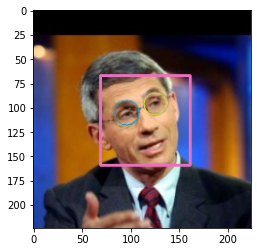

In [ ]:
img=cv2.imread("/content/drive/MyDrive/LFW/Face Dataset Train/100/1.jpg")
detect_faces_eyes(img)

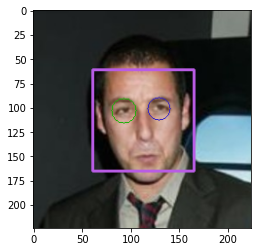

In [ ]:
img=cv2.imread("/content/drive/MyDrive/LFW/Face Dataset Train/10/0.jpg")
detect_faces_eyes(img)

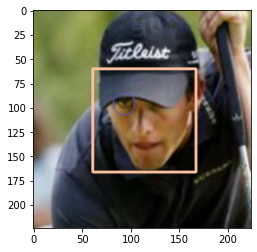

In [ ]:
img=cv2.imread("/content/drive/MyDrive/LFW/Face Dataset Train/11/0.jpg")
detect_faces_eyes(img)

# Face and keypoints detection using MTCNN


In [ ]:
pip install mtcnn

     |████████████████████████████████| 2.3 MB 5.4 MB/s 


In [ ]:
pip --version

pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)


In [ ]:
pip install --user virtualenv

     |████████████████████████████████| 5.3 MB 5.4 MB/s 
     |████████████████████████████████| 338 kB 47.0 MB/s 
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
pip install --upgrade tensorflow

In [ ]:
# confirm mtcnn was installed correctly
import mtcnn
import matplotlib.pyplot as plt
# print version
print(mtcnn.__version__)

0.1.0


In [ ]:
path = '/content/drive/MyDrive/LFW/Face Dataset Train/100/1.jpg' 

In [ ]:
detector = mtcnn.MTCNN()
# detect faces in the image
pixels=plt.imread(path)
faces = detector.detect_faces(pixels)
for face in faces:
    print(face)

{'box': [85, 74, 82, 110], 'confidence': 0.9995027780532837, 'keypoints': {'left_eye': (108, 119), 'right_eye': (141, 107), 'nose': (132, 135), 'mouth_left': (122, 158), 'mouth_right': (152, 149)}}


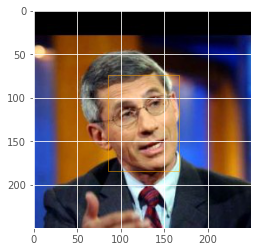

In [ ]:
def draw_facebox(path, result_list):
    # load the image
    data = plt.imread(path)
    # plot the image
    plt.imshow(data)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = plt.Rectangle((x, y), width, height, fill=False, color='orange')
        # draw the box
        ax.add_patch(rect)
    # show the plot
    plt.show()
    
# filename = 'test1.jpg' # filename is defined above, otherwise uncomment
# load image from file
# pixels = plt.imread(filename) # defined above, otherwise uncomment
# detector is defined above, otherwise uncomment
#detector = mtcnn.MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_facebox(path, faces)

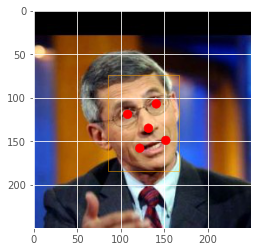

In [ ]:
def draw_facebox(path, result_list):
    # load the image
    data = plt.imread(path)
    # plot the image
    plt.imshow(data)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = plt.Rectangle((x, y), width, height,fill=False, color='orange')
        # draw the box
        ax.add_patch(rect)
        # draw the dots
        for key, value in result['keypoints'].items():
            # create and draw dot
            dot = plt.Circle(value, radius=5, color='red')
            ax.add_patch(dot)
            # show the plot
        plt.show()
 
# filename = 'test1.jpg' # filename is defined above, otherwise uncomment
# load image from file
# pixels = plt.imread(filename) # defined above, otherwise uncomment
# detector is defined above, otherwise uncomment
#detector = mtcnn.MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_facebox(path, faces)

# Face alignement and cropping



### The results we got from MTCNN were more accurate so we used them for face alignement.

In [ ]:
class FaceWarpException(Exception):
    def __str__(self):
        return 'In File {}:{}'.format(
            __file__, super.__str__(self))

In [ ]:
from skimage import transform as trans

# reference facial points, a list of coordinates (x,y)
REFERENCE_FACIAL_POINTS = [
    [30.29459953, 51.69630051],
    [65.53179932, 51.50139999],
    [48.02519989, 71.73660278],
    [33.54930115, 92.3655014],
    [62.72990036, 92.20410156]
]

DEFAULT_CROP_SIZE = (96, 112)


In [ ]:
def align_face(path,reference_pts=None,
                       crop_size=(96, 112),
                       align_type='smilarity'):
  src_img = plt.imread(path)
  detector = mtcnn.MTCNN()
  # detect faces in the image
  faces = detector.detect_faces(pixels)
  facial_pts=[]
  for key, value in faces[0]['keypoints'].items():
    facial_pts.append(value)
  if reference_pts is None:
        if crop_size[0] == 96 and crop_size[1] == 112:
            reference_pts = REFERENCE_FACIAL_POINTS
        else:
            default_square = False
            inner_padding_factor = 0
            outer_padding = (0, 0)
            output_size = crop_size

            reference_pts = get_reference_facial_points(output_size,
                                                        inner_padding_factor,
                                                        outer_padding,
                                                        default_square)

  ref_pts = np.float32(reference_pts)
  ref_pts_shp = ref_pts.shape
  if max(ref_pts_shp) < 3 or min(ref_pts_shp) != 2:
        raise FaceWarpException(
            'reference_pts.shape must be (K,2) or (2,K) and K>2')

  if ref_pts_shp[0] == 2:
        ref_pts = ref_pts.T

  src_pts = np.float32(facial_pts)
  src_pts_shp = src_pts.shape
  if max(src_pts_shp) < 3 or min(src_pts_shp) != 2:
        raise FaceWarpException(
            'facial_pts.shape must be (K,2) or (2,K) and K>2')

  if src_pts_shp[0] == 2:
        src_pts = src_pts.T

  if src_pts.shape != ref_pts.shape:
        raise FaceWarpException(
            'facial_pts and reference_pts must have the same shape')

  if align_type is 'cv2_affine':
        tfm = cv2.getAffineTransform(src_pts[0:3], ref_pts[0:3])
    #        print('cv2.getAffineTransform() returns tfm=\n' + str(tfm))
  elif align_type is 'affine':
        tfm = get_affine_transform_matrix(src_pts, ref_pts)
    #        print('get_affine_transform_matrix() returns tfm=\n' + str(tfm))
  else:
        # tfm = get_similarity_transform_for_cv2(src_pts, ref_pts)
        tform = trans.SimilarityTransform()
        tform.estimate(src_pts, ref_pts)
        tfm = tform.params[0:2, :]

  face_img = cv2.warpAffine(src_img, tfm, (crop_size[0], crop_size[1]))
  cv2_imshow(face_img)

 
  return face_img


array([[[ 36,  39,  45],
        [ 32,  36,  45],
        [ 38,  41,  52],
        ...,
        [ 24,   9,   5],
        [ 24,   9,   6],
        [ 23,   9,   7]],

       [[ 42,  45,  54],
        [ 39,  43,  54],
        [ 43,  43,  53],
        ...,
        [ 24,   9,   5],
        [ 24,   9,   6],
        [ 24,   8,   7]],

       [[ 55,  58,  66],
        [ 54,  56,  69],
        [ 51,  47,  55],
        ...,
        [ 25,   9,   4],
        [ 24,   9,   6],
        [ 24,   8,   8]],

       ...,

       [[ 13,  17,  28],
        [  3,  21,  23],
        [ 10,  25,  27],
        ...,
        [ 44,  93, 233],
        [ 42,  91, 232],
        [ 42,  90, 233]],

       [[ 12,  19,  28],
        [  3,  20,  24],
        [ 11,  23,  29],
        ...,
        [ 45,  94, 236],
        [ 43,  91, 235],
        [ 43,  90, 235]],

       [[ 13,  21,  29],
        [  7,  20,  26],
        [  9,  19,  26],
        ...,
        [ 46,  94, 237],
        [ 45,  92, 238],
        [ 45,  91, 238]]

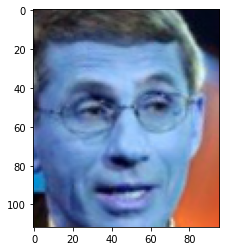

In [ ]:
align_face(path)

# Face recognition using Facenet

## Building model and training

In [ ]:
import pandas as pd
intertest = pd.read_csv("/content/drive/MyDrive/LFW/interclasse_test (2).txt", sep=" ", na_values=['Nothing'])
intertest

In [ ]:
intertrain = pd.read_csv("/content/drive/MyDrive/LFW/interclasse_train (1).txt", sep=" ", na_values=['Nothing'])
intertrain

,id1,img1,id2,img2
0,29,0.jpg,58,0.jpg
1,361,0.jpg,365,0.jpg
2,527,0.jpg,554,0.jpg
3,481,0.jpg,514,0.jpg
4,43,0.jpg,94,0.jpg
...,...,...,...,...
2773,745,0.jpg,778,0.jpg
2774,279,0.jpg,310,0.jpg
2775,706,0.jpg,756,0.jpg
2776,463,0.jpg,527,0.jpg


In [ ]:
 intratest= pd.read_csv("/content/drive/MyDrive/LFW/intraclasse_test (1).txt", sep=" ", na_values=['Nothing'])
intratest

,id1,img1,id2,img2
0,1003,0.jpg,1003,1.jpg
1,1003,0.jpg,1003,2.jpg
2,1003,1.jpg,1003,2.jpg
3,1012,0.jpg,1012,1.jpg
4,1013,0.jpg,1013,1.jpg
...,...,...,...,...
1111,987,1.jpg,987,4.jpg
1112,987,2.jpg,987,3.jpg
1113,987,2.jpg,987,4.jpg
1114,987,3.jpg,987,4.jpg


In [ ]:
intratrain = pd.read_csv("/content/drive/MyDrive/LFW/intraclasse_train (1).txt", sep=" ", na_values=['Nothing'])
intratrain

,id1,img1,id2,img2
0,0,0.jpg,0,1.jpg
1,0,0.jpg,0,2.jpg
2,0,0.jpg,0,3.jpg
3,0,1.jpg,0,2.jpg
4,0,1.jpg,0,3.jpg
...,...,...,...,...
2773,997,1.jpg,997,2.jpg
2774,998,0.jpg,998,1.jpg
2775,999,0.jpg,999,1.jpg
2776,999,0.jpg,999,2.jpg


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms, models
from torch.utils.data import Dataset, DataLoader
import torchvision.datasets as datasets
import random
import PIL
from PIL import Image
from pathlib import Path
import tqdm
from tqdm import tqdm_notebook
import pandas as pd
import glob
%matplotlib inline

In [ ]:
df = pd.DataFrame()

In [ ]:
#Generating triplets : img2_x is the positive one img2_y is the negative one
df = pd.merge(intratrain, intertrain, how='inner', on=['id1',"img1"])

In [ ]:
df

In [ ]:
def Iterate_files(directory):
   for filename in os.listdir(directory):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        i=os.path.join(directory, filename)
        print(str(i))
    else:
            continue

In [ ]:
df.shape[0]

4782

In [ ]:
class MyDataset(Dataset):
    def __init__(self, path, df,num_triplets, tfms=None):
        self.path = path
        self.df = df
        self.num_triplets = num_triplets
        self.tfms = tfms
        self.training_triplets = self.generate_triplets(self.df, self.num_triplets)
    @staticmethod
    def generate_triplets(df, num_triplets):
      triplets=[]
      for i in range(num_triplets):
        neg_id=df["img2_y"][i]
        pos_id=df["img2_x"][i]
        anc_id=df["img1"][i]
        pos_name=df["id1"][i]
        neg_name=df["id2_y"][i]
        triplets.append([anc_id, pos_id, neg_id,pos_name, neg_name])
      return triplets
    def __getitem__(self, i):
        anc_id, pos_id, neg_id, pos_name, neg_name = self.training_triplets[i]
        anc_img = (self.path/str(pos_name)/str(anc_id))
        pos_img = (self.path/str(pos_name)/str(pos_id))
        neg_img = (self.path/str(neg_name)/str(neg_id))
        anc_img = PIL.Image.open(anc_img)
        pos_img = PIL.Image.open(pos_img)
        neg_img = PIL.Image.open(neg_img)
        pos_name = torch.from_numpy(np.array([pos_name]).astype('long'))
        neg_name = torch.from_numpy(np.array([neg_name]).astype('long'))
        sample =[anc_img, pos_img, neg_img,pos_name, neg_name]
        
        if self.tfms: 
            sample[0] = self.tfms(sample[0])
            sample[1] = self.tfms(sample[1])
            sample[2] = self.tfms(sample[2])
        return sample
    def __len__(self): return len(self.training_triplets)

In [ ]:
batch_size = 32
triplets=4782
num_workers = 0
train_tfms = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
train_ds = MyDataset(Path('/content/drive/MyDrive/LFW/Face Data/Face Dataset'), df,num_triplets=triplets,tfms=train_tfms)
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=False, num_workers=num_workers)
train_data_size = len(train_ds)
train_data_size

4782

In [ ]:
class Net(nn.Module):
    def __init__(self, emb_size, num_classes, pretrained=False):
        super(Net, self).__init__()
        self.model = models.resnet34(pretrained)
        self.emb_size = emb_size 
        self.lin1 = nn.Linear(1000, emb_size)
        self.lin2 = nn.Linear(emb_size, num_classes)
    def l2_norm(self, input):
        input_size = input.size()
        buffer = torch.pow(input, 2)
        normp = torch.sum(buffer, 1).add_(1e-10)
        norm = torch.sqrt(normp)
        _output = torch.div(input, norm.view(-1, 1).expand_as(input))
        output = _output.view(input_size)
        return output
    def forward(self, x):
        x = self.model(x)
        x = self.lin1(x)
        self.features = self.l2_norm(x)
        alpha = 10
        self.features*=10
        return self.features
    def forward_classifier(self, x):
        features = self.forward(x)
        res = self.lin2(features)
        return res

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
model = Net(128, 4824, pretrained=True).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=500, gamma=0.1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [ ]:
from torch.nn.modules.distance import PairwiseDistance
l2_dist = PairwiseDistance(2)

In [ ]:
margin = 0.5

In [ ]:
class TripletLoss(nn.Module):
    def __init__(self, margin):
        super(TripletLoss, self).__init__()
        self.margin = margin
        self.pdist = PairwiseDistance(2)
    def forward(self, anc, pos, neg):
        pos_dist = self.pdist(anc, pos)
        neg_dist = self.pdist(anc, neg)
        
        hinge_dist = torch.clamp(self.margin+pos_dist-neg_dist, min=0.0)
        loss = torch.mean(hinge_dist)
        return loss

In [ ]:
for epoch in range(5):
    triplet_loss_sum = 0.0
    scheduler.step()
    model.train()
    torch.cuda.synchronize()
    for batch_idx, batch_sample in tqdm_notebook(enumerate(train_dl)):
        anc_img = batch_sample[0].to(device)
        pos_img = batch_sample[1].to(device)
        neg_img = batch_sample[2].to(device)
        pos_cls = batch_sample[3].to(device)
        neg_cls = batch_sample[4].to(device)
        anc_embed, pos_embed, neg_embed = model(anc_img), model(pos_img), model(neg_img)
        pos_dist = l2_dist(anc_embed, pos_embed)
        neg_dist = l2_dist(anc_embed, neg_embed)
        all = (neg_dist - pos_dist < margin).cpu().numpy().flatten()
        hard_triplets = np.where(all==1)
        if len(hard_triplets)==0: continue
        anc_hard_embed = anc_embed[hard_triplets].to(device)
        pos_hard_embed = pos_embed[hard_triplets].to(device)
        neg_hard_embed = neg_embed[hard_triplets].to(device)
        triplet_loss = TripletLoss(margin)(anc_hard_embed, pos_hard_embed, neg_hard_embed).to(device)
        optimizer.zero_grad()
        triplet_loss.backward()
        optimizer.step()
        triplet_loss_sum+=triplet_loss.item()
        torch.cuda.synchronize()
    avg_loss = triplet_loss_sum/len(train_dl.dataset)
    print('Epoch', epoch)
    print('Loss: ', avg_loss)

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch 0
Loss:  0.01819251548765295


0it [00:00, ?it/s]

Epoch 1
Loss:  0.01646104187633342


0it [00:00, ?it/s]

Epoch 2
Loss:  0.015947358817522718


0it [00:00, ?it/s]

Epoch 3
Loss:  0.015764608630222637


0it [00:00, ?it/s]

Epoch 4
Loss:  0.015605942181392177


In [ ]:
torch.save(model.state_dict(),"/content/drive/MyDrive/LFW/Mode1")

**texte en gras**## Testing and evaluating

In [ ]:
model.load_state_dict(torch.load("/content/drive/MyDrive/LFW/Mode1"))
model.eval()

Net(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_s

In [ ]:
df1=intertest.append(intratest, ignore_index=True)

In [ ]:
df1

,id1,img1,id2,img2
0,268,0.jpg,302,0.jpg
1,123,0.jpg,179,0.jpg
2,262,0.jpg,294,0.jpg
3,335,0.jpg,376,0.jpg
4,31,0.jpg,72,0.jpg
...,...,...,...,...
2227,987,1.jpg,987,4.jpg
2228,987,2.jpg,987,3.jpg
2229,987,2.jpg,987,4.jpg
2230,987,3.jpg,987,4.jpg


In [ ]:
df1 = df1.sample(frac = 1)

In [ ]:
df1

,id1,img1,id2,img2
2077,733,0.jpg,733,2.jpg
1362,1312,0.jpg,1312,2.jpg
1667,254,0.jpg,254,1.jpg
2038,71,0.jpg,71,2.jpg
718,175,0.jpg,199,0.jpg
...,...,...,...,...
1229,1183,0.jpg,1183,2.jpg
960,73,0.jpg,138,0.jpg
360,320,0.jpg,380,0.jpg
912,382,0.jpg,403,0.jpg


In [ ]:
test_tfms = transforms.Compose([
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
class TestDataset(Dataset):
    def __init__(self, path, test_df, test_tfms=None):
        self.path = path
        self.test_tfms = test_tfms
        self.images1 = test_df['img1'].tolist()
        self.images2 = test_df['img2'].tolist()
        self.id1=test_df["id1"].tolist()
        self.id2=test_df["id2"].tolist()
    def __getitem__(self, idx):
        img1 = PIL.Image.open(self.path/str(self.id1[idx])/self.images1[idx])
        img2 = PIL.Image.open(self.path/str(self.id1[idx])/self.images2[idx])
        if test_tfms is not None:
            img1 = self.test_tfms(img1)
            img2 = self.test_tfms(img2)
        return img1, img2
    def __len__(self): return len(self.images1)


In [ ]:
test_ds = TestDataset(Path("/content/drive/MyDrive/LFW/Face Data/Face Dataset"), df1, test_tfms=test_tfms)
test_dl = DataLoader(test_ds, batch_size=batch_size, shuffle=False, num_workers=0)

In [ ]:
preds = []

In [ ]:
sample_test = next(iter(test_dl))

In [ ]:
out1, out2 = model(sample_test[0].cuda()), model(sample_test[1].cuda())

In [ ]:
out1.shape

torch.Size([32, 128])

In [ ]:
def pairwise_distances(x, y=None):
    '''
    Input: x is a Nxd matrix
           y is an optional Mxd matirx
    Output: dist is a NxM matrix where dist[i,j] is the square norm between x[i,:] and y[j,:]
            if y is not given then use 'y=x'.
    i.e. dist[i,j] = ||x[i,:]-y[j,:]||^2
    '''
    x_norm = (x**2).sum(1).view(-1, 1)
    if y is not None:
        y_norm = (y**2).sum(1).view(1, -1)
    else:
        y = x
        y_norm = x_norm.view(1, -1)

    dist = x_norm + y_norm - 2.0 * torch.mm(x, torch.transpose(y, 0, 1))
    return dist

In [ ]:
np.linalg.norm(out1.cpu().detach().numpy()-out2.cpu().detach().numpy(), axis=1)

array([0.23789228, 0.33970106, 0.37581587, 0.8266433 , 0.        ,
       0.        , 0.        , 0.6529719 , 0.        , 0.        ,
       0.0189697 , 0.38108963, 0.7768045 , 0.        , 0.        ,
       0.06506015, 0.        , 0.        , 0.7282962 , 0.6931193 ,
       0.8522287 , 0.        , 0.5727874 , 0.        , 0.73321635,
       0.5830866 , 0.30988678, 0.02236481, 0.        , 0.81673306,
       0.14445217, 0.        ], dtype=float32)

In [ ]:
for i, data in tqdm_notebook(enumerate(test_dl)):
    img1, img2 = data
    img1 = img1.cuda()
    img2 = img2.cuda()
    output1, output2 = model(img1), model(img2)
    dist = np.linalg.norm(output1.cpu().detach().numpy()-output2.cpu().detach().numpy(), axis=1)
    preds.extend(dist.tolist())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


0it [00:00, ?it/s]

In [ ]:
len(preds)

2232

In [ ]:
preds

[0.237892284989357,
 0.3397010564804077,
 0.37581586837768555,
 0.8266432881355286,
 0.0,
 0.0,
 0.0,
 0.6529719233512878,
 0.0,
 0.0,
 0.018969696015119553,
 0.38108962774276733,
 0.776804506778717,
 0.0,
 0.0,
 0.06506014615297318,
 0.0,
 0.0,
 0.7282962203025818,
 0.6931192874908447,
 0.8522287011146545,
 0.0,
 0.5727874040603638,
 0.0,
 0.7332163453102112,
 0.5830866098403931,
 0.30988678336143494,
 0.022364811971783638,
 0.0,
 0.8167330622673035,
 0.14445216953754425,
 0.0,
 0.5185792446136475,
 0.0,
 0.04673926532268524,
 0.0,
 0.0,
 0.11472932994365692,
 0.7129361629486084,
 0.0,
 0.26572704315185547,
 0.0918482095003128,
 0.0,
 0.0,
 0.0,
 0.7900184392929077,
 0.0,
 0.0,
 0.0,
 0.27922070026397705,
 0.0,
 0.4340682923793793,
 0.818556010723114,
 0.5125042200088501,
 0.0,
 0.2644115686416626,
 0.8934324979782104,
 0.4737665057182312,
 0.0,
 0.18439054489135742,
 0.0,
 0.0,
 0.6181020140647888,
 0.837318480014801,
 0.17353904247283936,
 0.0,
 0.24287086725234985,
 0.8565366268157

In [ ]:
pred = [1 if p>0 else 0 for p in preds]


In [ ]:
pred

[1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,


In [ ]:
df1['target'] = pred

In [ ]:
df1

,id1,img1,id2,img2,target
2077,733,0.jpg,733,2.jpg,1
1362,1312,0.jpg,1312,2.jpg,1
1667,254,0.jpg,254,1.jpg,1
2038,71,0.jpg,71,2.jpg,1
718,175,0.jpg,199,0.jpg,0
...,...,...,...,...,...
1229,1183,0.jpg,1183,2.jpg,1
960,73,0.jpg,138,0.jpg,0
360,320,0.jpg,380,0.jpg,0
912,382,0.jpg,403,0.jpg,0


In [ ]:
def accuracy(df):
  x=0
  for i in range(2232):
    if (df["id1"][i]==df["id2"][i]) and (df["target"][i]==1):
      x=x+1
    if (df["id1"][i]!=df["id2"][i]) and (df["target"][i]==0):
      x=x+1
  return x/(2232)


In [ ]:
accuracy(df1)

0.9762544802867383

# Face recognition using SVM

SVM is a classification algoritm that wouldn't work out very well unless we have big number of images per person, in this case we won't be using the similar/ dissimilar pairs and the data we prepared previously since the number of images per person is between 2 and 5. We will be importing the LFW data set from sklearn.

In [21]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


We will be plotting a few of these faces to see what we're working with: These faces are already aligned and cropped.

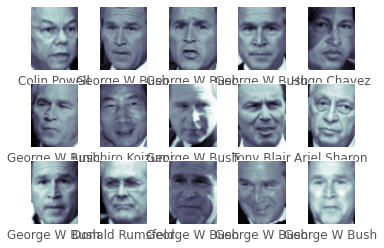

In [22]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

Each image contains [62×47] or nearly 3,000 pixels. We could proceed by simply using each pixel value as a feature, but often it is more effective to use some sort of preprocessor to extract more meaningful features; here we will use a principal component analysisto extract 150 fundamental components to feed into our support vector machine classifier. We can do this most straightforwardly by packaging the preprocessor and the classifier into a single pipeline:

In [23]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
pca = PCA(n_components=150, whiten=True, random_state=42)
from sklearn.pipeline import make_pipeline


svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

For the sake of testing our classifier output, we will split the data into a training and testing set:

In [24]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

Finally, we can use a grid search cross-validation to explore combinations of parameters. Here we will adjust C (which controls the margin hardness) and gamma (which controls the size of the radial basis function kernel), and determine the best model:

In [25]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 1min 5s, sys: 38.7 s, total: 1min 43s
Wall time: 1min 1s
{'svc__C': 10, 'svc__gamma': 0.001}


The optimal values fall toward the middle of our grid; if they fell at the edges, we would want to expand the grid to make sure we have found the true optimum.

Now with this cross-validated model, we can predict the labels for the test data, which the model has not yet seen:

In [27]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Let's take a look at a few of the test images along with their predicted values:

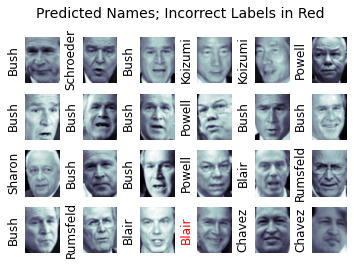

In [28]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [29]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337

